<a href="https://colab.research.google.com/github/zunileiva/Cdac_Day13/blob/main/jm_ARIMA_passengerS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from math import sqrt


import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [ ]:
df = pd.read_csv('passenger.csv',header=None)

In [ ]:
df.columns = ['year','passengers']

In [ ]:
df.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
print('Time period start: {}\nTime period end: {}'.format(df.year.min(),df.year.max()))

Time period start: 1949-01
Time period end: 1960-12


In [ ]:
df.shape

(144, 2)

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y-%m')

In [ ]:
y = df.set_index('year')

In [ ]:
y.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='year', length=144, freq=None)

In [ ]:
y.isnull().sum()

passengers    0
dtype: int64

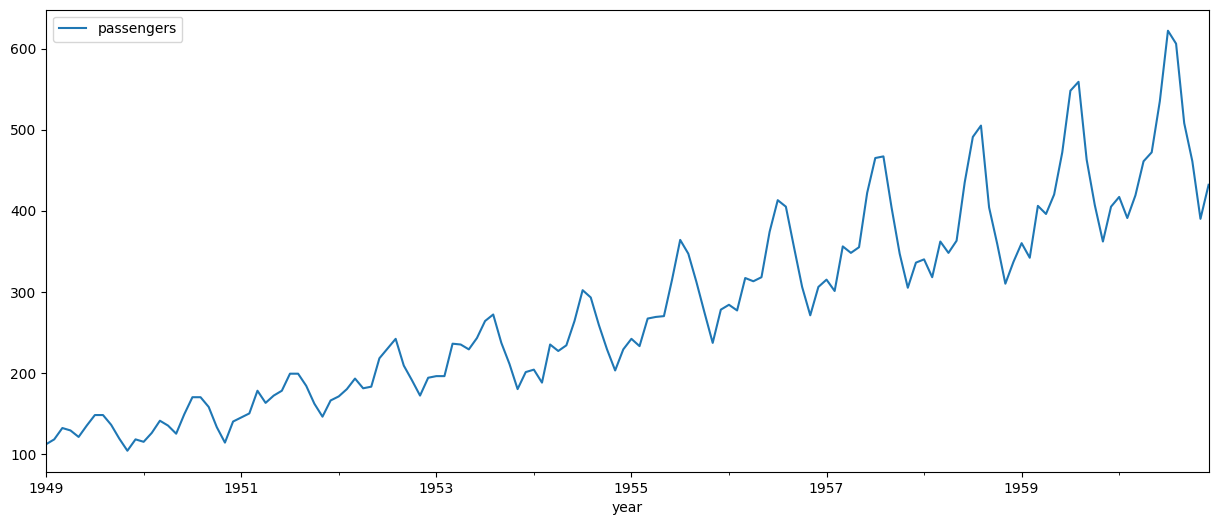

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


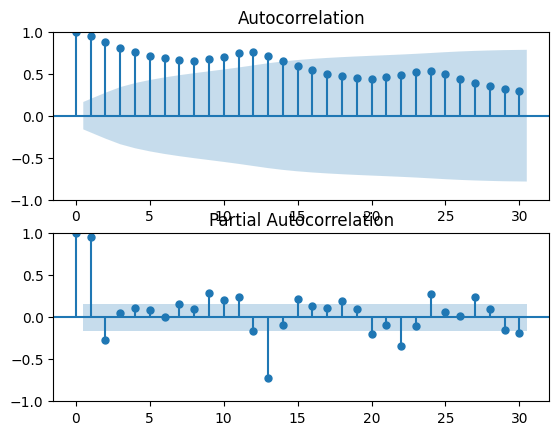

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()  # ACF PACF PLOTS
plt.subplot(211)
plot_acf(y.passengers, ax=plt.gca(), lags = 30)    # y data (non stationary)
plt.subplot(212)
plot_pacf(y.passengers, ax=plt.gca(), lags = 30)
plt.show()

GO FOR AN ADF TEST

In [ ]:
ts = y.passengers - y.passengers.shift(1)    #differencing METHOD GIVES YOU A STATIONARY SERIES
                                            #FOR ARIMA DIFFERENCING IS MUST
ts.dropna(inplace=True)

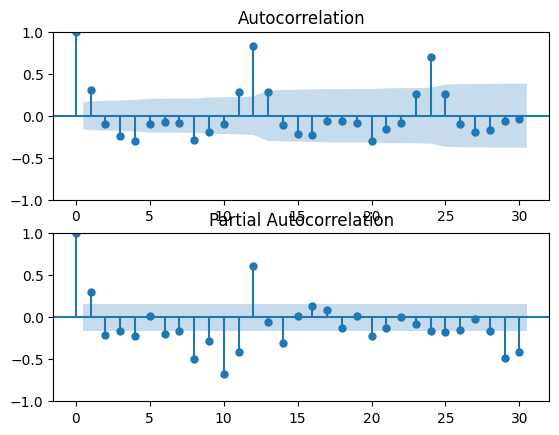

In [ ]:
plt.figure()                                #AUTOCORRELATION PLOTS   (p,q)
plt.subplot(211)
plot_acf(ts, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(),lags=30)
plt.show()

perform ADF TO CONFIRM STATIONARY ON ts

<Axes: xlabel='year'>

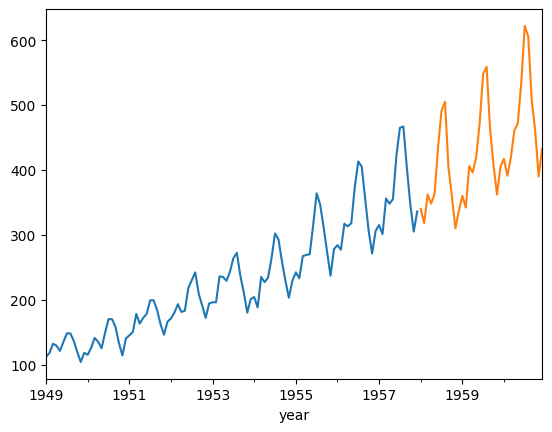

In [ ]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['passengers'].plot()
valid['passengers'].plot()

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train, order=(2,1,2))
results=model.fit()
results.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  108
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -488.048
Date:                Mon, 24 Jul 2023   AIC                            986.096
Time:                        08:55:33   BIC                            999.413
Sample:                    01-01-1949   HQIC                           991.494
                         - 12-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5113      0.128     -3.981      0.000      -0.763      -0.260
ar.L2          0.0969      0.102      0.950      0.342      -0.103       0.297
ma.L1         -0.0654     73.629     -0.001      0.999    -144.376     144.246
ma.L2         -0.9346     68.810     -0.014      0.989    -135.799     133.930
sigma2       558.1917   4.11e+04      0.014      0.989      -8e+04    8.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.96   Prob(JB):                         0.45
Heteroskedasticity (H):               4.71   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = results.predict(start=start_index, end=end_index)

In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred)}, index=[0])

    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(y[start_index:end_index], predictions)    #actual          (y)    vs prediction(test)


,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,0.051109,54.133515,39.631017,5805.604385,0.027367,76.194517


In [ ]:

from statsmodels.graphics.tsaplots import plot_predict


#plot_predict(results,1,264)
x=results.forecast(steps=120)  #10 *12=120
x

1958-01-01    359.949738
1958-02-01    353.947485
1958-03-01    362.576922
1958-04-01    360.821339
1958-05-01    365.794229
                 ...    
1967-08-01    618.901671
1967-09-01    621.191498
1967-10-01    623.481325
1967-11-01    625.771151
1967-12-01    628.060978
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64